In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
xgboost_rmse = pd.read_excel("../data/impact_of_n_feats.xlsx", sheet_name="XGBoost RMSE")
xgboost_r2 = pd.read_excel("../data/impact_of_n_feats.xlsx", sheet_name="XGBoost R2")
lightgbm_rmse = pd.read_excel("../data/impact_of_n_feats.xlsx", sheet_name="LightGBM RMSE")
lightgbm_r2 = pd.read_excel("../data/impact_of_n_feats.xlsx", sheet_name="LightGBM R2")
cnn1d_rmse = pd.read_excel("../data/impact_of_n_feats.xlsx", sheet_name="1dCNN RMSE")
cnn1d_r2 = pd.read_excel("../data/impact_of_n_feats.xlsx", sheet_name="1dCNN R2")

Text(0, 0.5, 'R$^2$')

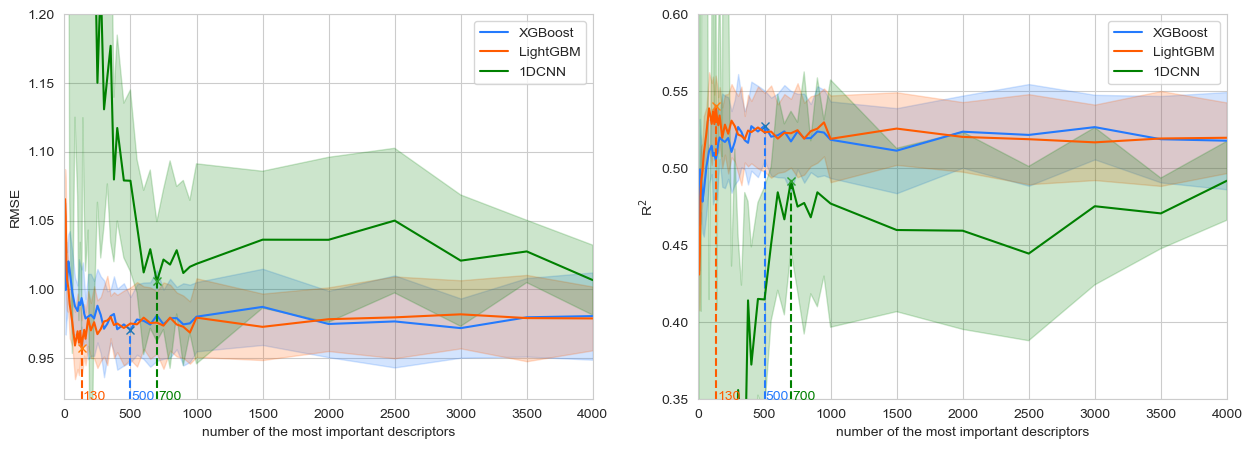

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_ylim(0.92, 1.2)
ax2.set_ylim(0.35, 0.6)
colors = ["#247afd", "#ff5b00", "green"]
labels = ['XGBoost', 'LightGBM', '1DCNN']

for rmse, color, label in zip([xgboost_rmse, lightgbm_rmse, cnn1d_rmse], colors, labels):
    rmse_mean = rmse.groupby('n_feats')['rmse'].mean()
    sns.lineplot(rmse, x="n_feats", y="rmse", ax=ax1, errorbar="sd", color=color, label=label)
    ax1.axvline(x=rmse_mean.idxmin(),
                ymin=0,
                ymax=(rmse_mean.min() - ax1.get_ylim()[0]) / (ax1.get_ylim()[1] - ax1.get_ylim()[0]),
                color=color, linestyle='--')
    ax1.set_xlim(0, rmse["n_feats"].max())
    ax1.plot(rmse_mean.idxmin(), rmse_mean.min(), 'x')
    ax1.text(int(rmse_mean.idxmin()) + 10, ax1.get_ylim()[0], f"{rmse_mean.idxmin()}", color=color)

for r2, color, label in zip([xgboost_r2, lightgbm_r2, cnn1d_r2], colors, labels):
    r2_mean = r2.groupby('n_feats')['r2'].mean()
    sns.lineplot(r2, x="n_feats", y="r2", ax=ax2, errorbar="sd", color=color, label=label)
    ax2.axvline(x=r2_mean.idxmax(),
                ymin=0,
                ymax=(r2_mean.max() - ax2.get_ylim()[0]) / (ax2.get_ylim()[1] - ax2.get_ylim()[0]),
                color=color, linestyle='--')
    ax2.set_xlim(0, r2["n_feats"].max())
    ax2.plot(r2_mean.idxmax(), r2_mean.max(), 'x')
    ax2.text(int(r2_mean.idxmax()) + 10, ax2.get_ylim()[0], f"{r2_mean.idxmax()}", color=color)

ax1.set_xlabel("number of the most important descriptors")
ax2.set_xlabel("number of the most important descriptors")
ax1.set_ylabel("RMSE")
ax2.set_ylabel("R$^2$")

In [4]:
xlsx = pd.ExcelFile('../data/feature.importance.xlsx')
dfs = []

for sheet_name in xlsx.sheet_names:
    dfs.append(pd.read_excel(xlsx, sheet_name=sheet_name, index_col=0))

In [5]:
mean_rank = pd.DataFrame((dfs[0].mean(axis=1) + dfs[1].mean(axis=1) + dfs[2].mean(axis=1) + dfs[3].mean(axis=1) + dfs[
    4].mean(axis=1) + dfs[5].mean(axis=1) + dfs[6].mean(axis=1) + dfs[7].mean(axis=1) + dfs[8].mean(
    axis=1))).sort_values(by=0, ascending=False)

In [11]:
mean_rank

,0
CDKJPLogP,4.688234
Rdkit2DMolLogP,4.636937
CDKXLogP,3.523227
MordredFilterItLogS,3.096777
MordredRNCG,1.724878
...,...
Circular215,0.462402
Circular1474,0.460336
Circular1769,0.452008
Circular1244,0.444011


In [7]:
trn = pd.read_csv("../data/processed/trn.feat.cdk.csv")
N = 2000
topNcorr = trn[mean_rank.head(N).index].corr()

Text(45.58159722222221, 0.5, 'n$^{\\text{th}}$ most important descriptor')

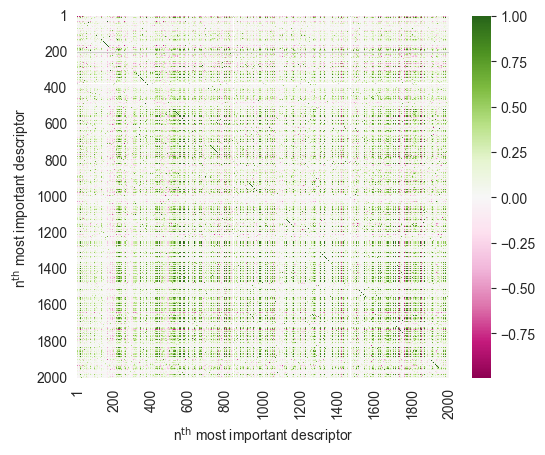

In [8]:
plt.figure(figsize=(6, 4.7))
ax = sns.heatmap(topNcorr, cmap="PiYG")
ax.set_xticks([1, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
ax.set_xticklabels([1, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
ax.set_yticks([1, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
ax.set_yticklabels([1, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
ax.set_xlabel("n$^{\\text{th}}$ most important descriptor")
ax.set_ylabel("n$^{\\text{th}}$ most important descriptor")